In [698]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

#### You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
#"default" is my dependent variable
#Age (numeric)
#Sex (text: male, female)
#Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
#Housing (text: own, rent, or free)
#Saving accounts (text - little, moderate, quite rich, rich)
#Checking account (numeric, in DM - Deutsch Mark)
#Credit amount (numeric, in DM)
#Duration (numeric, in month)
#Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [699]:
credit_df = pd.read_csv("german_credit.csv")

In [700]:
credit_df.info()
credit_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

(1000, 21)

In [701]:
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [702]:
interval = (18, 25, 35, 60, 120)

categories = ['Student', 'Young', 'Adult', 'Senior']
credit_df["Age_cat"] = pd.cut(credit_df.age, interval, labels=categories)

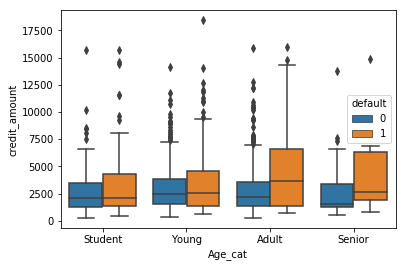

In [703]:
sns.boxplot(credit_df['Age_cat'],credit_df['credit_amount'],data=credit_df,hue='default')

In [ ]:
sns.countplot(credit_df['housing'])

In [ ]:
sns.boxplot(credit_df['housing'],credit_df['credit_amount'],data=credit_df,hue='default')

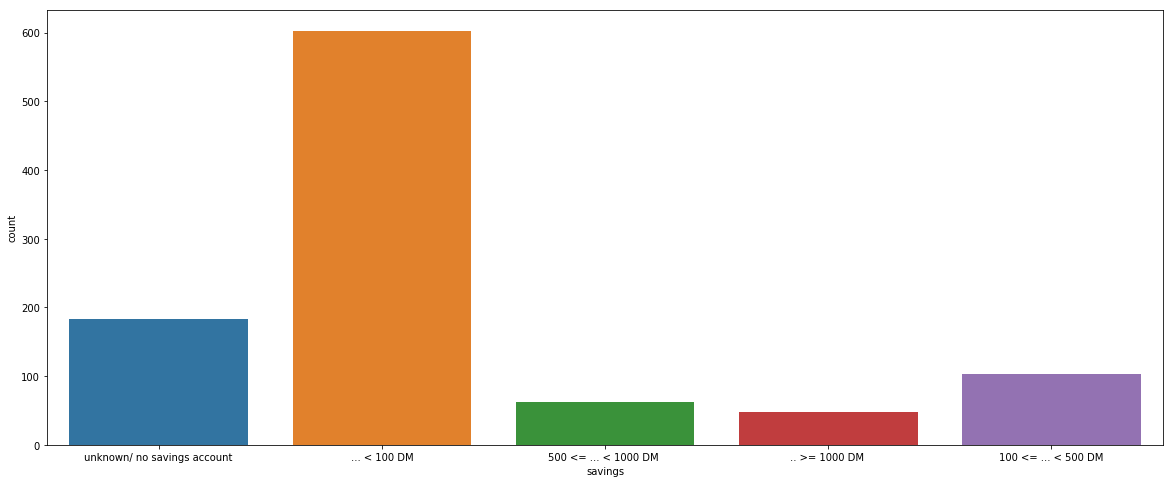

In [704]:
plt.figure(figsize = (20,8))
sns.countplot(credit_df['savings'])

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(221)
g = sns.countplot(x="purpose", data=credit_df, 
              palette="hls", hue = "default")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="purpose", y="credit_amount", data=credit_df, 
                    palette="hls", hue = "default")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)
g1.set_title("Credit Amount by Purpose", fontsize=20)


plt.subplot(212)
g2 = sns.boxplot(x="housing", y="credit_amount", data=credit_df, 
               palette="hls",hue = "default")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Housing", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()


In [705]:
# Lets build a Ensemble model but need to modify the dataset first

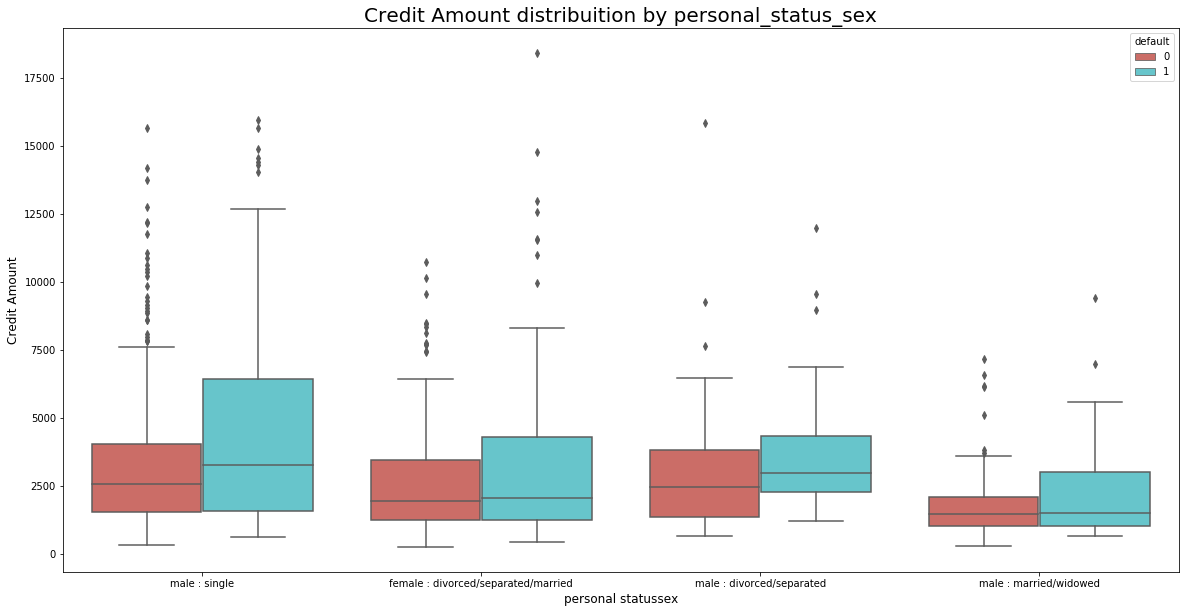

In [706]:
plt.figure(figsize = (20,10))
g2 = sns.boxplot(x="personal_status_sex", y="credit_amount", data=credit_df, 
               palette="hls",hue = "default")
g2.set_xlabel("personal statussex", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by personal_status_sex", fontsize=20)

plt.show()

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [707]:
# Print Shape of model data
credit_df.shape

(1000, 22)

In [708]:
if credit_df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")
else:
   print("There are nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


In [709]:
def dummies(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    original_df=df[categorical_columns]
    df = pd.get_dummies(df)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df,new_columns,categorical_columns,original_df

In [710]:
credit_df, new_columns, categorical_columns,original_df =dummies(credit_df)
credit_df_new = pd.concat([credit_df, original_df], axis=1)

In [711]:
credit_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 79 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

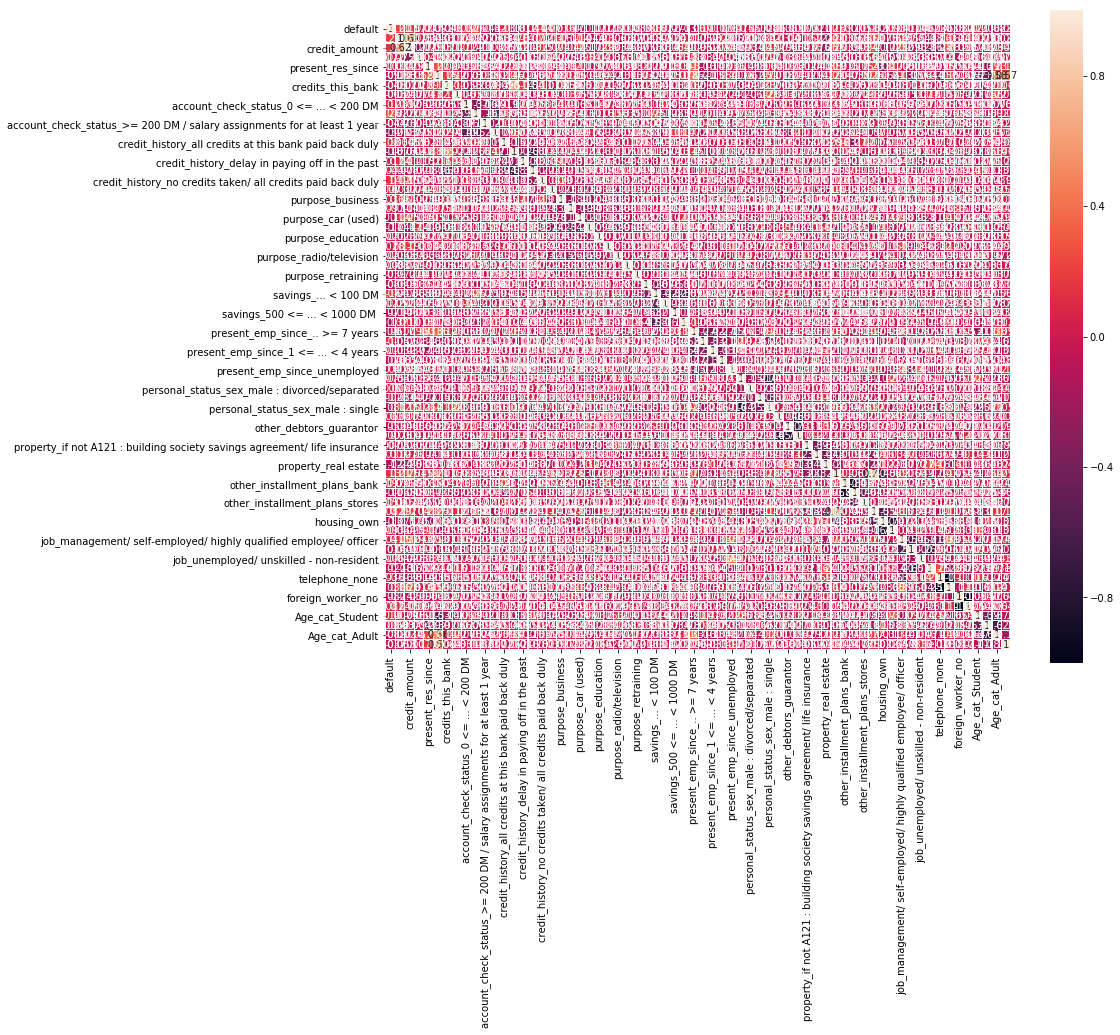

In [615]:
plt.figure(figsize=(14,12))
sns.heatmap(credit_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

##### credit_amount, duration_in_month, age seems to be correlated

### Drop the original variables which are converted to dummy

In [712]:
credit_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 79 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

In [713]:
categorical_columns

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [714]:
credit_df_new.drop(categorical_columns, axis=1,inplace = True) 

In [715]:
credit_df=credit_df_new
credit_df.shape

(1000, 66)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [716]:
from sklearn.model_selection import train_test_split
X = credit_df.drop(["default"], axis=1)
y = credit_df[["default"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [717]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [718]:
rfcl.score(X_train, y_train)

1.0

In [719]:
rfcl.score(X_test, y_test)

0.7666666666666667

In [720]:
y_predict = rfcl.predict(X_test)

In [721]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score #To evaluate our model
print("Classification Report")
print(classification_report(y_test, y_predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))
print("Accuracy Score")
print(accuracy_score(y_test, y_predict))
print("F1 Score")
print(f1_score(y_test, y_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       209
           1       0.72      0.37      0.49        91

    accuracy                           0.77       300
   macro avg       0.75      0.66      0.67       300
weighted avg       0.76      0.77      0.74       300

Confusion Matrix
[[196  13]
 [ 57  34]]
Accuracy Score
0.7666666666666667
F1 Score
0.49275362318840593


### Q6 Show the list of the features importance( 1 Marks)

In [722]:
for feature in zip(credit_df.columns, rfcl.feature_importances_):
    print(feature)

('default', 0.07950566204332676)
('duration_in_month', 0.09828818338887374)
('credit_amount', 0.03347038648763925)
('installment_as_income_perc', 0.03167726143458587)
('present_res_since', 0.0696599293585078)
('age', 0.01820203862951794)
('credits_this_bank', 0.006870321324142919)
('people_under_maintenance', 0.01703623546766735)
('account_check_status_0 <= ... < 200 DM', 0.034645642427501594)
('account_check_status_< 0 DM', 0.009104353056109078)
('account_check_status_>= 200 DM / salary assignments for at least 1 year', 0.04319400894023792)
('account_check_status_no checking account', 0.01120819462316258)
('credit_history_all credits at this bank paid back duly', 0.02580821967317635)
('credit_history_critical account/ other credits existing (not at this bank)', 0.008932739985652242)
('credit_history_delay in paying off in the past', 0.0143200751453514)
('credit_history_existing credits paid back duly till now', 0.012614324921976823)
('credit_history_no credits taken/ all credits paid 

In [723]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfcl, threshold=0.015)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [724]:
for feature_list_index in sfm.get_support(indices=True):
    print(credit_df.columns[feature_list_index])

default
duration_in_month
credit_amount
installment_as_income_perc
present_res_since
age
people_under_maintenance
account_check_status_0 <= ... < 200 DM
account_check_status_>= 200 DM / salary assignments for at least 1 year
credit_history_all credits at this bank paid back duly
purpose_business
savings_.. >= 1000 DM 
personal_status_sex_male : married/widowed
housing_for free


In [725]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [726]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred = rfcl.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

##### Not much difference in accuracy  between important feature and full model, so keeping model with full feature

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [727]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve,auc, precision_score, recall_score, f1_score

In [728]:
# Use below values
num_folds = 10
seed = 77

In [729]:
#Validate the Random Forest model build above using k fold

In [730]:
def compute_roc_auc(index):
    y_predict = rfcl.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [731]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

In [732]:
cv = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores, auc_scores, confusion_matrices, auc_diff, precision_scores, f1_scores, recall_scores = [], [], [], [], [], [], [], [], []
for (train, test), i in zip(cv.split(X, y), range(60)):
    rfcl.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append(rfcl.score(X.iloc[test], y.iloc[test]))
    y_predict = rfcl.predict(X.iloc[test])
    precision_scores.append(precision_score(y.iloc[test],y_predict))
    recall_scores.append(recall_score(y.iloc[test],y_predict))
    f1_scores.append(f1_score(y.iloc[test],y_predict))
    auc_scores.append((auc_score))
    auc_diff.append((auc_score_train,auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    confusion_matrices.append(confusion_matrix(y.iloc[test],y_predict))

#### at times confusion matrix array throws an error 'numpy.ndarray' object is not callable' but when re-run it goes away 

In [733]:
#Calculate Mean score

In [734]:
mean_scores = np.mean(scores, axis=0)

In [735]:
print("Mean Scores",mean_scores)

Mean Scores 0.7699999999999999


In [736]:
# Calculate score standard deviation using std()

In [737]:
std_scores = np.std(scores, axis=0)
print("Standard Deviation Scores",std_scores)

Standard Deviation Scores 0.049799598391954934


In [687]:
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=10)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.119, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.071, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.071, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.146, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.095, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.143, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.095, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.071, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5, score=0.122, total=   0.1s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.024, total=   0.1s
[CV] max_depth=3, max_featu

[CV]  max_depth=3, max_features=7, n_estimators=150, score=0.024, total=   0.6s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.143, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.429, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.310, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.286, total=   0.1s
[CV] max_depth=3, max_features=15, n_estimators=3 ....................
[CV]  max_depth=3, max_features=15, n_estimators=3, score=0.220, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=5 ....................
[CV]  max_depth=3, max_features=15, n_estimators=5, score=0.048, total=   0.0s
[CV] max_depth=3, ma

[CV]  max_depth=3, max_features=20, n_estimators=50, score=0.171, total=   0.3s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.071, total=   1.2s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.143, total=   1.2s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.143, total=   1.0s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.143, total=   0.9s
[CV] max_depth=3, max_features=20, n_estimators=150 ..................
[CV]  max_depth=3, max_features=20, n_estimators=150, score=0.171, total=   0.9s
[CV] max_depth=5, max_features=4, n_estimators=3 .....................
[CV]  max_depth=5, max_features=4, n_estimators=3, score=0.214, total=   0.0s
[CV] max_de

[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.143, total=   0.3s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.143, total=   0.2s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.143, total=   0.3s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.071, total=   0.2s
[CV] max_depth=5, max_features=7, n_estimators=50 ....................
[CV]  max_depth=5, max_features=7, n_estimators=50, score=0.122, total=   0.2s
[CV] max_depth=5, max_features=7, n_estimators=150 ...................
[CV]  max_depth=5, max_features=7, n_estimators=150, score=0.119, total=   0.6s
[CV] max_depth=5, max_features=7, n_estimators=150 ...................
[CV]  max_depth=5, max_features=7, n_estimators=150, score=0.119, total=   0.7s
[CV] max_depth=5, m

[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.333, total=   0.4s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.405, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.310, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.333, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=25 ...................
[CV]  max_depth=5, max_features=20, n_estimators=25, score=0.268, total=   0.2s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.238, total=   0.5s
[CV] max_depth=5, max_features=20, n_estimators=50 ...................
[CV]  max_depth=5, max_features=20, n_estimators=50, score=0.262, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.262, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=10 ....................
[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.238, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=10 ....................
[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.238, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=10 ....................
[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.429, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=10 ....................
[CV]  max_depth=7, max_features=7, n_estimators=10, score=0.195, total=   0.1s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.333, total=   0.2s
[CV] max_depth=7, max_features=7, n_estimators=25 ....................
[CV]  max_depth=7, max_features=7, n_estimators=25, score=0.262, total=   0.4s
[CV] max_depth=7, max

[CV]  max_depth=7, max_features=20, n_estimators=5, score=0.500, total=   0.1s
[CV] max_depth=7, max_features=20, n_estimators=5 ....................
[CV]  max_depth=7, max_features=20, n_estimators=5, score=0.357, total=   0.1s
[CV] max_depth=7, max_features=20, n_estimators=5 ....................
[CV]  max_depth=7, max_features=20, n_estimators=5, score=0.381, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=5 ....................
[CV]  max_depth=7, max_features=20, n_estimators=5, score=0.476, total=   0.0s
[CV] max_depth=7, max_features=20, n_estimators=5 ....................
[CV]  max_depth=7, max_features=20, n_estimators=5, score=0.512, total=   0.1s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.452, total=   0.2s
[CV] max_depth=7, max_features=20, n_estimators=10 ...................
[CV]  max_depth=7, max_features=20, n_estimators=10, score=0.357, total=   0.1s
[CV] max_depth=7, m

[CV]  max_depth=10, max_features=7, n_estimators=3, score=0.476, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=3 ....................
[CV]  max_depth=10, max_features=7, n_estimators=3, score=0.268, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=5 ....................
[CV]  max_depth=10, max_features=7, n_estimators=5, score=0.262, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=5 ....................
[CV]  max_depth=10, max_features=7, n_estimators=5, score=0.262, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=5 ....................
[CV]  max_depth=10, max_features=7, n_estimators=5, score=0.381, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=5 ....................
[CV]  max_depth=10, max_features=7, n_estimators=5, score=0.524, total=   0.1s
[CV] max_depth=10, max_features=7, n_estimators=5 ....................
[CV]  max_depth=10, max_features=7, n_estimators=5, score=0.415, total=   0.1s
[CV] max_depth=10, ma

[CV]  max_depth=10, max_features=15, n_estimators=150, score=0.429, total=   1.1s
[CV] max_depth=10, max_features=15, n_estimators=150 .................
[CV]  max_depth=10, max_features=15, n_estimators=150, score=0.415, total=   1.1s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.310, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.452, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.429, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.500, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=3 ...................
[CV]  max_depth=10, max_features=20, n_estimators=3, score=0.341, total=   0.0s
[CV] max_d

[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.310, total=   0.3s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.452, total=   0.3s
[CV] max_depth=None, max_features=4, n_estimators=50 .................
[CV]  max_depth=None, max_features=4, n_estimators=50, score=0.220, total=   0.4s
[CV] max_depth=None, max_features=4, n_estimators=150 ................
[CV]  max_depth=None, max_features=4, n_estimators=150, score=0.262, total=   1.0s
[CV] max_depth=None, max_features=4, n_estimators=150 ................
[CV]  max_depth=None, max_features=4, n_estimators=150, score=0.333, total=   0.9s
[CV] max_depth=None, max_features=4, n_estimators=150 ................
[CV]  max_depth=None, max_features=4, n_estimators=150, score=0.333, total=   1.0s
[CV] max_depth=None, max_features=4, n_estimators=150 ................
[CV]  max_depth=None, max_features=4, n_estimators=150, score=0.357, total=   0

[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.476, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=25 ................
[CV]  max_depth=None, max_features=15, n_estimators=25, score=0.415, total=   0.1s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.381, total=   0.3s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.405, total=   0.3s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.381, total=   0.2s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.405, total=   0.2s
[CV] max_depth=None, max_features=15, n_estimators=50 ................
[CV]  max_depth=None, max_features=15, n_estimators=50, score=0.439, total= 

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [688]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.4453733200597311
{'max_depth': 10, 'max_features': 15, 'n_estimators': 3}


In [691]:
rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=3, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)
# Apply The Full Featured Classifier To The Test Data
y_pred = rf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.6566666666666666

In [692]:
###First full model is giving better accuracy in this case

# Q8 Print the confusion matrix( 1 Marks)

In [738]:
i=1
for cm in confusion_matrices:
    print("Confusion Matrix for iteration ",i)
    print(cm)
    i=i+1

Confusion Matrix for iteration  1
[[67  4]
 [12 17]]
Confusion Matrix for iteration  2
[[67  4]
 [15 14]]
Confusion Matrix for iteration  3
[[67  5]
 [24  4]]
Confusion Matrix for iteration  4
[[76  2]
 [16  6]]
Confusion Matrix for iteration  5
[[58  9]
 [22 11]]
Confusion Matrix for iteration  6
[[59  7]
 [19 15]]
Confusion Matrix for iteration  7
[[59  8]
 [18 15]]
Confusion Matrix for iteration  8
[[62  7]
 [16 15]]
Confusion Matrix for iteration  9
[[65  4]
 [21 10]]
Confusion Matrix for iteration  10
[[67  3]
 [14 16]]


In [739]:
##Final model
rfcl.score(X_test, y_test)
y_predict = rfcl.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict))

Confusion Matrix
[[208   1]
 [  4  87]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [740]:
##correct prediction or  f1 scores
i=1
for fs in f1_scores:
    print("F1 Score for iteration ",i)
    print(fs)
    i=i+1

F1 Score for iteration  1
0.68
F1 Score for iteration  2
0.5957446808510638
F1 Score for iteration  3
0.21621621621621623
F1 Score for iteration  4
0.39999999999999997
F1 Score for iteration  5
0.4150943396226416
F1 Score for iteration  6
0.5357142857142857
F1 Score for iteration  7
0.5357142857142857
F1 Score for iteration  8
0.5660377358490567
F1 Score for iteration  9
0.4444444444444444
F1 Score for iteration  10
0.653061224489796


In [741]:
##Recall or sensitivity Score
i=1
for rs in recall_scores:
    print("Recall Score for iteration ",i)
    print(rs)
    i=i+1

Recall Score for iteration  1
0.5862068965517241
Recall Score for iteration  2
0.4827586206896552
Recall Score for iteration  3
0.14285714285714285
Recall Score for iteration  4
0.2727272727272727
Recall Score for iteration  5
0.3333333333333333
Recall Score for iteration  6
0.4411764705882353
Recall Score for iteration  7
0.45454545454545453
Recall Score for iteration  8
0.4838709677419355
Recall Score for iteration  9
0.3225806451612903
Recall Score for iteration  10
0.5333333333333333


In [742]:
##Precision Score
i=1
for ps in precision_scores:
    print("Precision Score for iteration ",i)
    print(ps)
    i=i+1

Precision Score for iteration  1
0.8095238095238095
Precision Score for iteration  2
0.7777777777777778
Precision Score for iteration  3
0.4444444444444444
Precision Score for iteration  4
0.75
Precision Score for iteration  5
0.55
Precision Score for iteration  6
0.6818181818181818
Precision Score for iteration  7
0.6521739130434783
Precision Score for iteration  8
0.6818181818181818
Precision Score for iteration  9
0.7142857142857143
Precision Score for iteration  10
0.8421052631578947


In [744]:
print("Classification Report")
rfcl.score(X_test, y_test)
y_predict = rfcl.predict(X_test)
print(classification_report(y_test, y_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       209
           1       0.99      0.96      0.97        91

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [590]:
#Hint: Use roc_curve

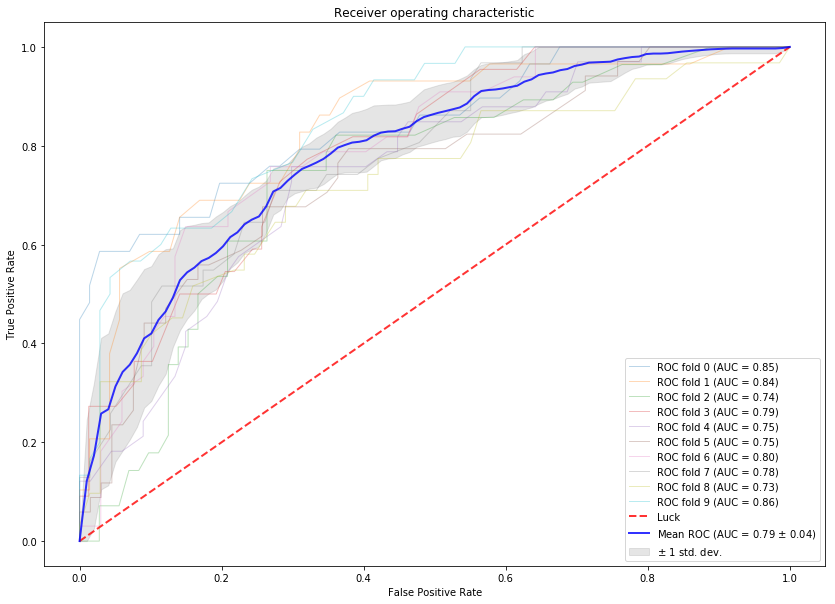

In [745]:
plot_roc_curve(fprs, tprs);

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [746]:
pd.DataFrame(auc_diff, columns=['AUC Train', 'AUC Test'])

,AUC Train,AUC Test
0,1.0,0.845313
1,1.0,0.838514
2,1.0,0.741319
3,1.0,0.792249
4,1.0,0.747173
5,1.0,0.749109
6,1.0,0.798055
7,1.0,0.784946
8,1.0,0.732118
9,1.0,0.855714


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [747]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [750]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [751]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7403333333333333
Standard deviation:  0.016086571349351528


In [753]:
##Std deviation is less than the k-fold